In [1]:
import numpy as np
import gym
from dezero import Model
from dezero import optimizers
import dezero.functions as F
import dezero.layers as L

In [2]:
class Policy(Model):
    def __init__(self, action_size):
        super().__init__()
        self.l1 = L.Linear(128)
        self.l2 = L.Linear(action_size)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.softmax(self.l2(x))
        return x


In [3]:
class Agent:
    def __init__(self):
        self.gamma = 0.98
        self.lr = 0.0002
        self.action_size = 2

        self.memory = []
        self.pi = Policy(self.action_size)
        self.optimizer = optimizers.Adam(self.lr)
        self.optimizer.setup(self.pi)

    def get_action(self, state):
        state = state[np.newaxis, :]
        probs = self.pi(state)
        probs = probs[0]
        action = np.random.choice(len(probs), p=probs.data)
        return action, probs[action]

    def add(self, reward, prob):
        data = (reward, prob)
        self.memory.append(data)

    def update(self):
        self.pi.cleargrads()

        G, loss = 0, 0
        for reward, prob in reversed(self.memory):
            G = reward + self.gamma * G  # 수익 G 계산
            loss += -F.log(prob) * G     # 손실 함수 계산

        loss.backward()
        self.optimizer.update()
        self.memory = []


In [4]:
episodes = 3000
env = gym.make('CartPole-v0', render_mode='rgb_array')
agent = Agent()
reward_history = []

C:\Users\ljy25\anaconda3\lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [5]:
for episode in range(episodes):
    state = env.reset()[0]
    done = False
    sum_reward = 0

    while not done:
        action, prob = agent.get_action(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated | truncated

        agent.add(reward, prob)
        state = next_state
        sum_reward += reward

    agent.update()

    reward_history.append(sum_reward)
    if episode % 100 == 0:
        print("episode :{}, total reward : {:.1f}".format(episode, sum_reward))



C:\Users\ljy25\anaconda3\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


episode :0, total reward : 20.0
episode :100, total reward : 10.0
episode :200, total reward : 100.0
episode :300, total reward : 27.0
episode :400, total reward : 41.0
episode :500, total reward : 120.0
episode :600, total reward : 110.0
episode :700, total reward : 99.0
episode :800, total reward : 70.0
episode :900, total reward : 200.0
episode :1000, total reward : 195.0
episode :1100, total reward : 164.0
episode :1200, total reward : 187.0
episode :1300, total reward : 200.0
episode :1400, total reward : 177.0
episode :1500, total reward : 200.0
episode :1600, total reward : 200.0
episode :1700, total reward : 200.0
episode :1800, total reward : 200.0
episode :1900, total reward : 200.0
episode :2000, total reward : 132.0
episode :2100, total reward : 200.0
episode :2200, total reward : 200.0
episode :2300, total reward : 200.0
episode :2400, total reward : 115.0
episode :2500, total reward : 199.0
episode :2600, total reward : 200.0
episode :2700, total reward : 200.0
episode :2

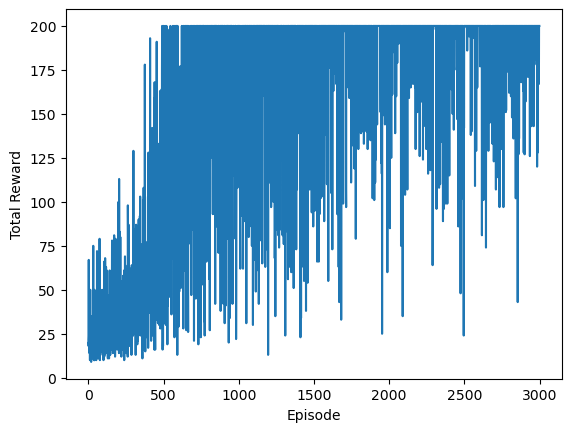

In [6]:
from utils import plot_total_reward
plot_total_reward(reward_history)